# DCGAN CIFAR-10

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision.transforms import transforms
from torchvision.datasets import CIFAR10

from DCGAN.dcgan_cifar10 import (
    Generator,
    Discriminator,
    GeneratorLoss,
    DiscriminatorLoss
)

In [2]:
if torch.cuda.is_available(): device = torch.device('cuda')
elif torch.backends.mps.is_available(): device = torch.device('mps')
else: device = torch.device('cpu')
print(f'Using device: {device}')

Using device: cuda


In [3]:
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [4]:
nrows, ncols = 4, 4
Z_noise = [
    torch.distributions.uniform.Uniform(low=-1, high=1).sample([1, 100]).to(device)
    for _ in range(ncols*nrows)
]

def save_plot(
        generator: nn.Module,
        Z_noise: list[torch.Tensor],
        epoch: int,
        nrows: int=nrows,
        ncols: int=ncols,
        figsize: tuple[int, int]=(6, 6),
    ) -> None:
    """Saves images to create a GIF"""
    if not os.path.isdir('./cifar10_dcgan_images'):
        os.makedirs('./cifar10_dcgan_images')
    generator.eval() 
    fig, ax = plt.subplots(nrows, ncols, figsize=figsize)  
    ax = ax.flatten() 
    images = [generator(z).view(3, 32, 32).permute(1, 2, 0).detach().cpu().numpy() for z in Z_noise]
    for i in range(nrows * ncols):
        ax[i].imshow(((images[i]+1)/2).clip(0, 1))
        ax[i].axis('off')
    plt.tight_layout() 
    plt.savefig(f'./cifar10_dcgan_images/{epoch}_cifar10_dcgan.png')
    plt.close(fig) 

In [5]:
def load_cifar10(root: str='./cifar10', batch_size: int=128) -> tuple[DataLoader, DataLoader]:
    """
    Loads CIFAR-10 dataset and returns it as a dataloader. 
    """ 
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

    cifar10 = CIFAR10(
        root=root,
        download=True,
        transform=transform
    )
    dataloader = DataLoader(cifar10, batch_size=batch_size, shuffle=True)
    return dataloader

In [ ]:
# Create generator and discriminator
G = Generator().to(device)
D = Discriminator().to(device)

# Hyperparameters
epochs = 50
batch_size = 128
lr_G = 0.0002
betas_G = (0.5, 0.999)
lr_D = 0.0002
betas_D = (0.5, 0.999)
verbose = True
plotting = True

# Create the optimizer and the loss
criterion_G = GeneratorLoss()
optimizer_G = torch.optim.Adam(params=G.parameters(), lr=lr_G, betas=betas_G)
criterion_D = DiscriminatorLoss()
optimizer_D = torch.optim.Adam(params=D.parameters(), lr=lr_D, betas=betas_D)

# Load the dataset
IMAGE_SHAPE = (3, 32, 32)
dataloader = load_cifar10(batch_size=batch_size)

In [7]:
# Plot settings (2)
figsize = (10, 4)
nrows = 2
ncols = 5

epoch: 0 loss generator: 4.0136 loss discriminator: 0.3270


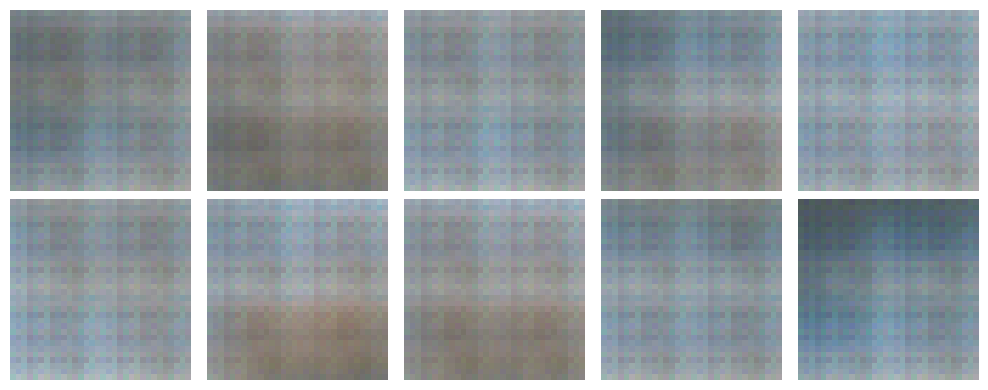

epoch: 1 loss generator: 3.3006 loss discriminator: 0.7051


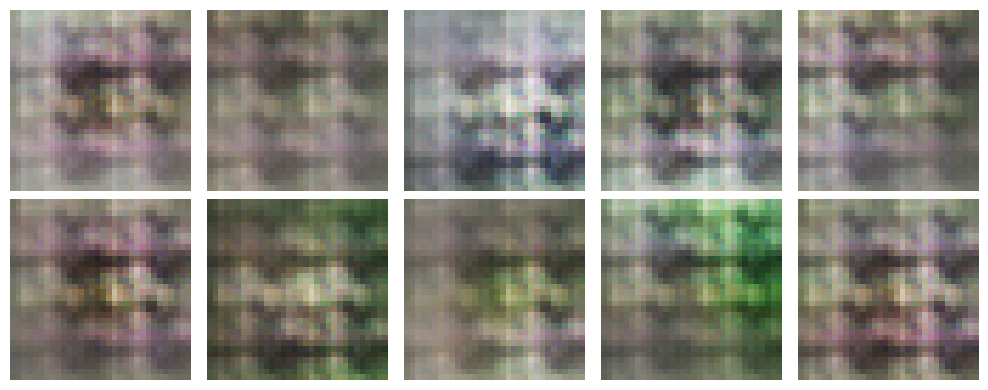

epoch: 2 loss generator: 3.8656 loss discriminator: 0.6554


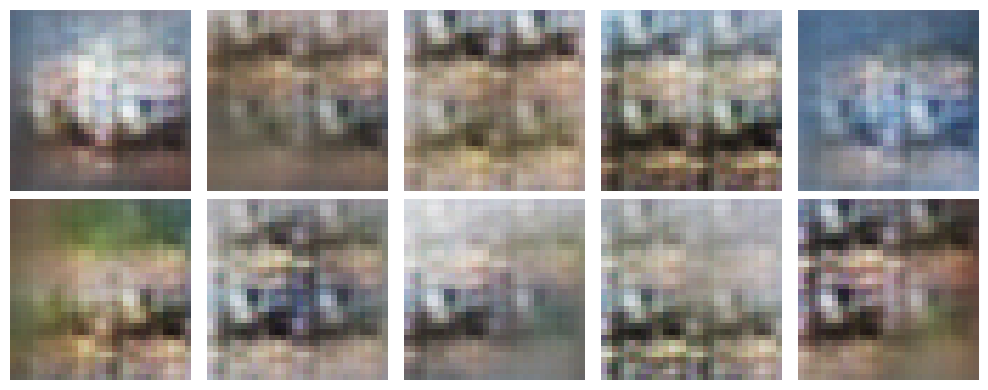

epoch: 3 loss generator: 3.9704 loss discriminator: 0.6303


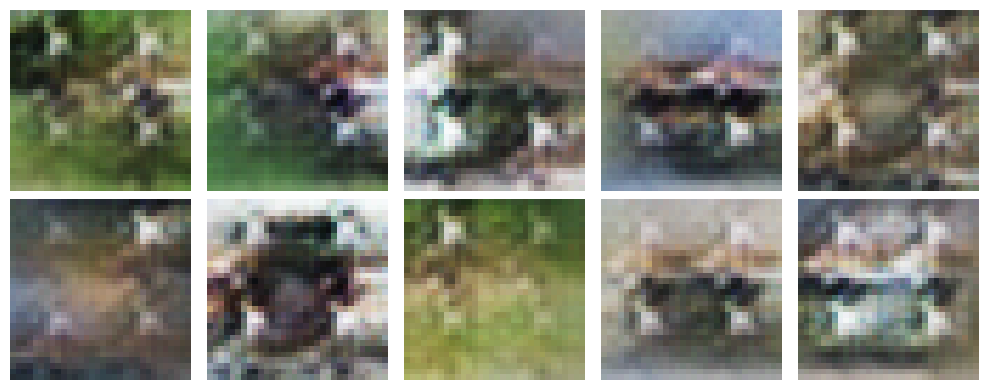

epoch: 4 loss generator: 3.6057 loss discriminator: 0.6603


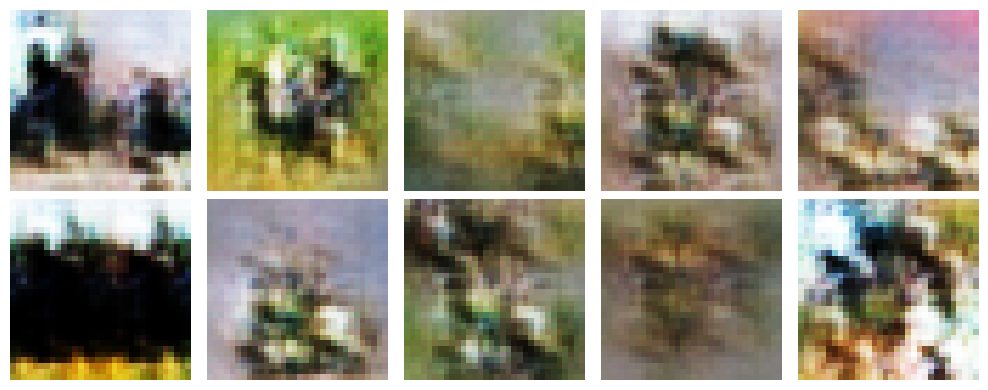

epoch: 5 loss generator: 3.4953 loss discriminator: 0.6274


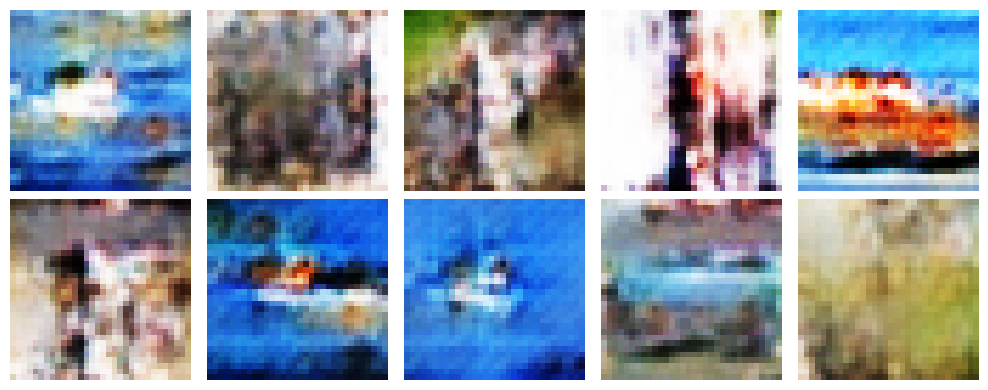

epoch: 6 loss generator: 3.3167 loss discriminator: 0.6361


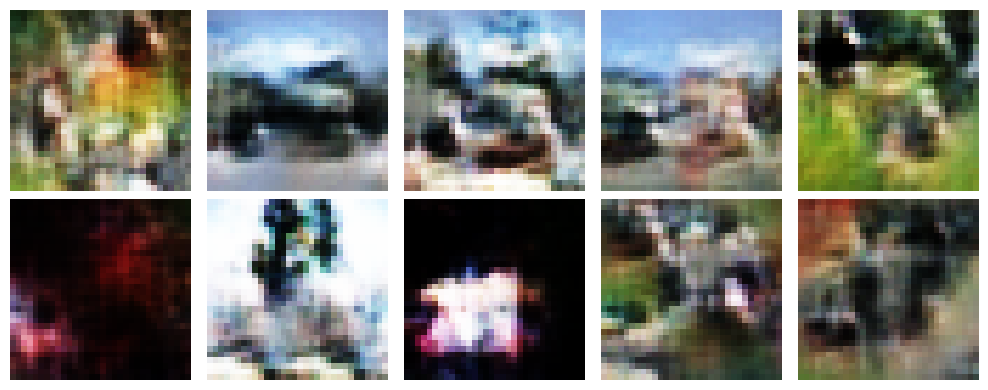

epoch: 7 loss generator: 2.9430 loss discriminator: 0.6592


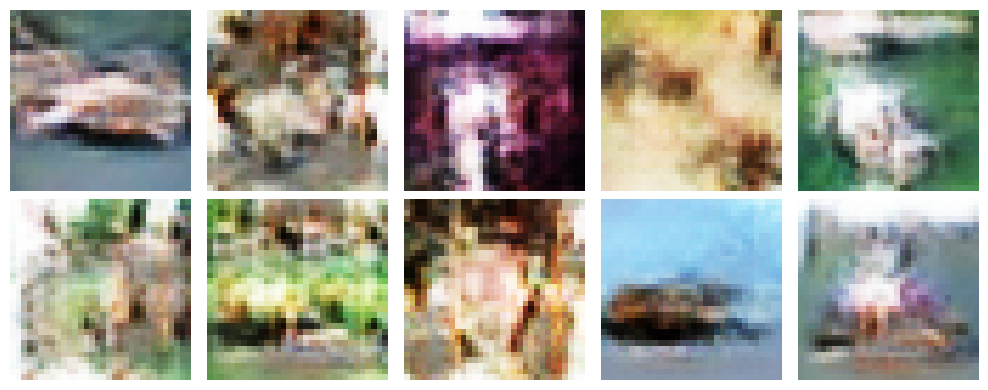

epoch: 8 loss generator: 3.0815 loss discriminator: 0.6205


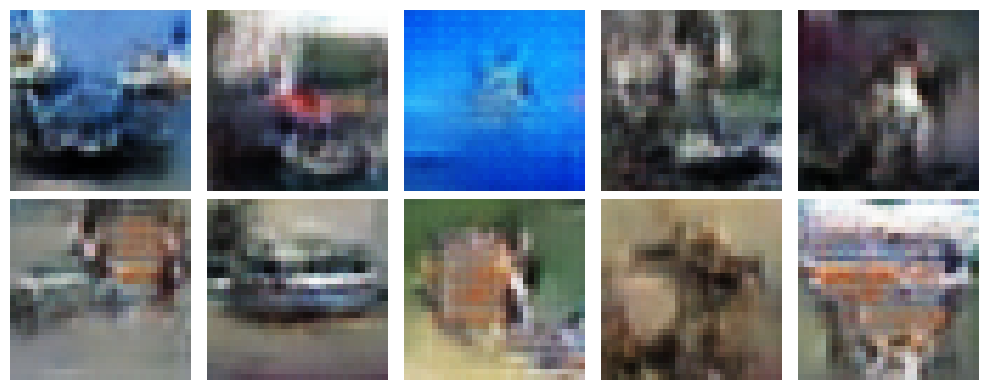

epoch: 9 loss generator: 3.1866 loss discriminator: 0.5685


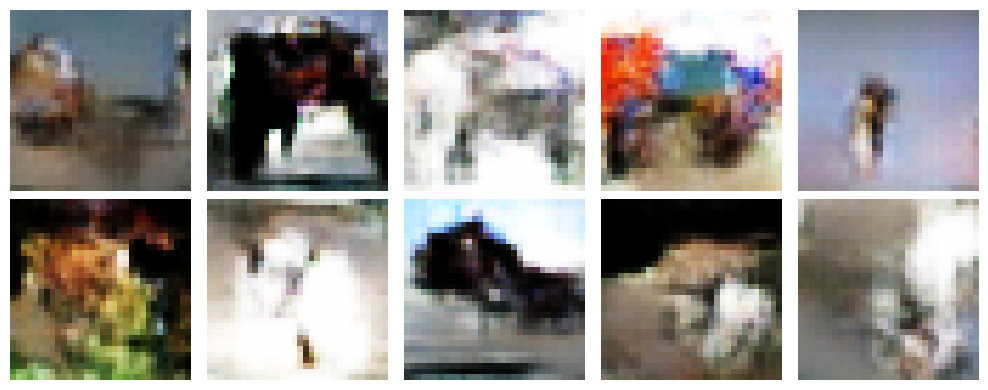

epoch: 10 loss generator: 3.2868 loss discriminator: 0.5328


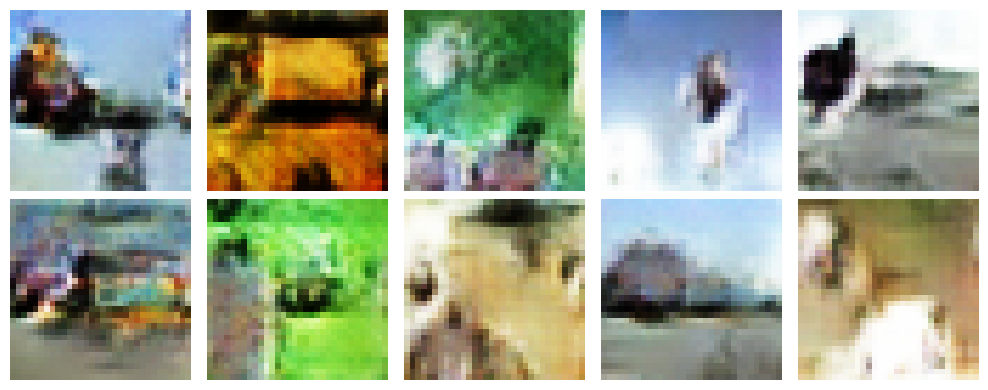

epoch: 11 loss generator: 3.3237 loss discriminator: 0.5174


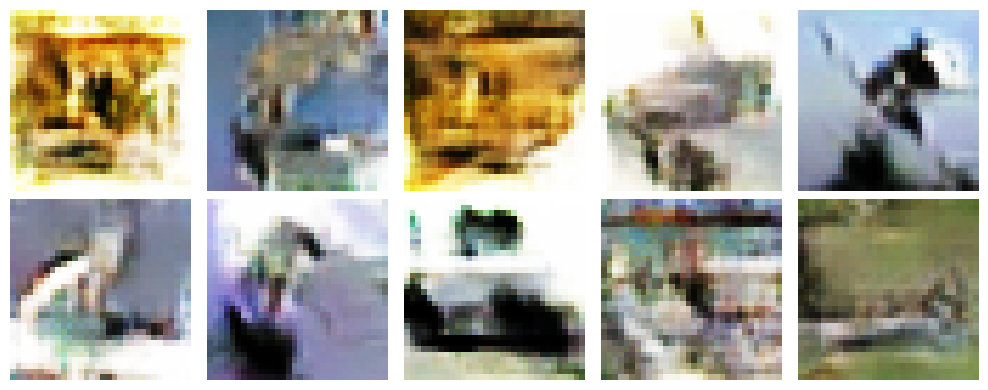

epoch: 12 loss generator: 3.3596 loss discriminator: 0.5178


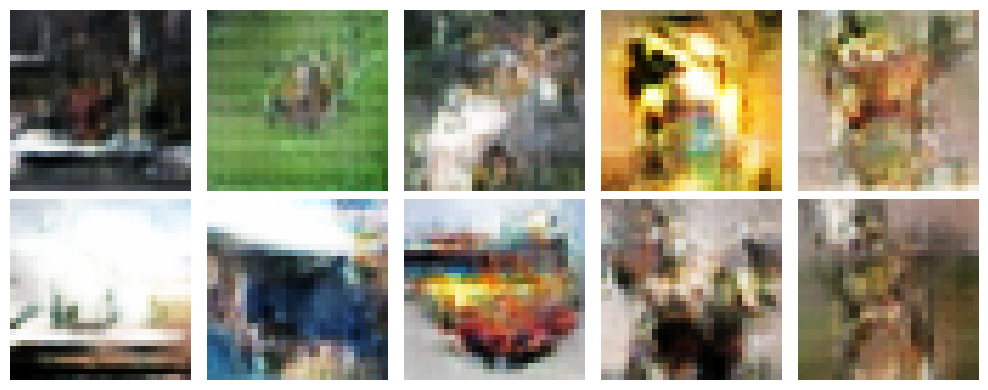

epoch: 13 loss generator: 3.3240 loss discriminator: 0.4800


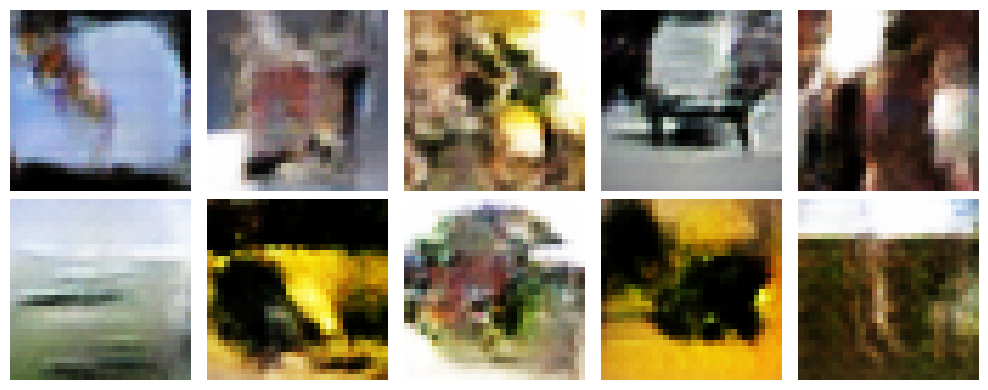

epoch: 14 loss generator: 3.4014 loss discriminator: 0.4737


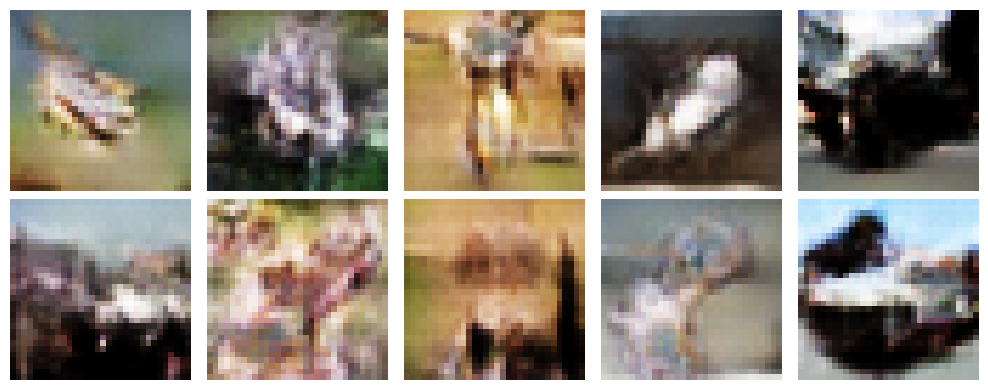

epoch: 15 loss generator: 3.3823 loss discriminator: 0.4656


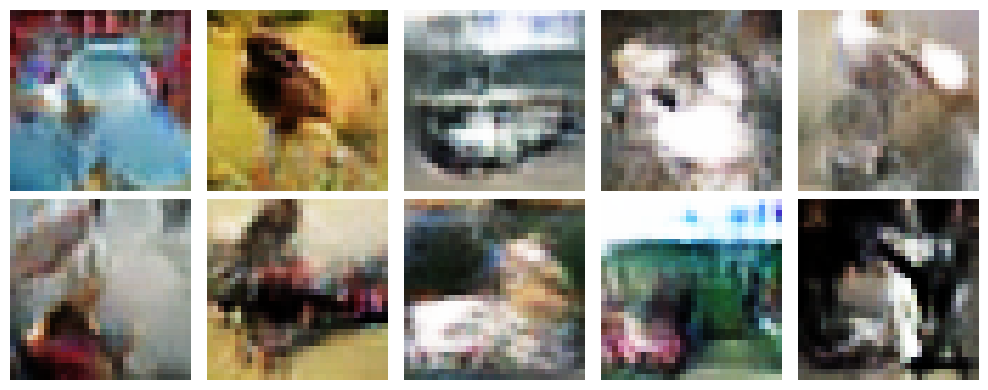

epoch: 16 loss generator: 3.3048 loss discriminator: 0.4641


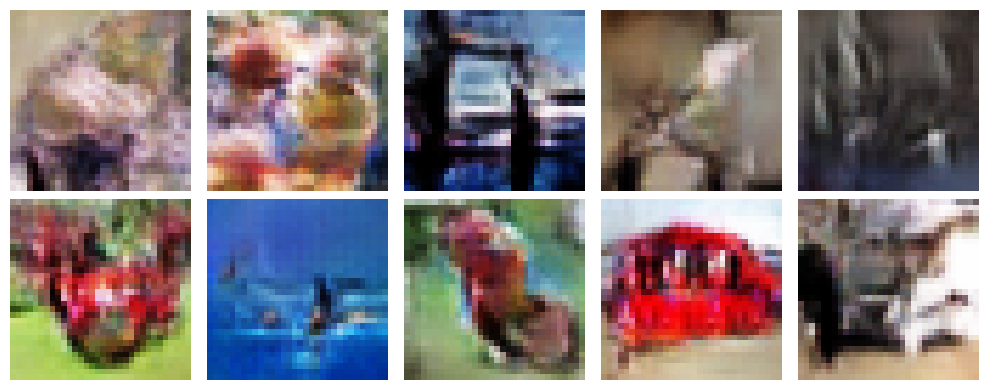

epoch: 17 loss generator: 3.3614 loss discriminator: 0.4454


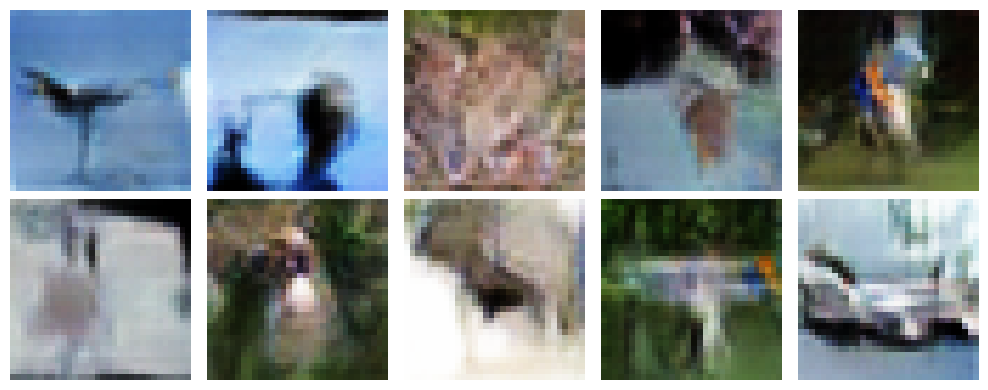

epoch: 18 loss generator: 3.4473 loss discriminator: 0.4593


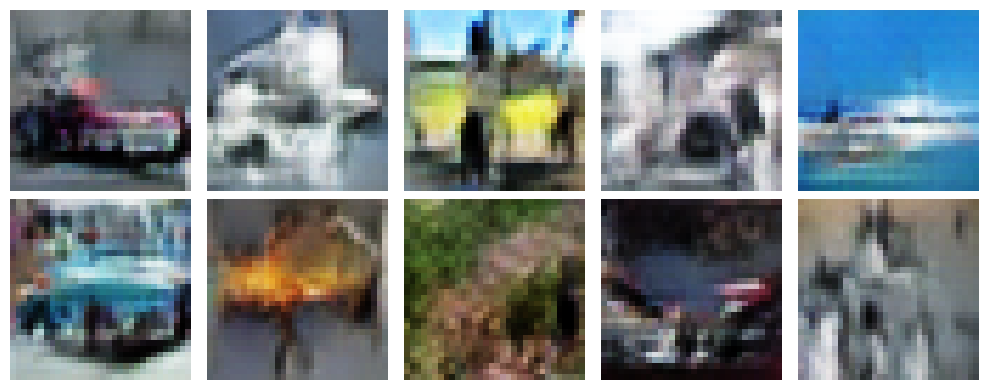

epoch: 19 loss generator: 3.3958 loss discriminator: 0.4049


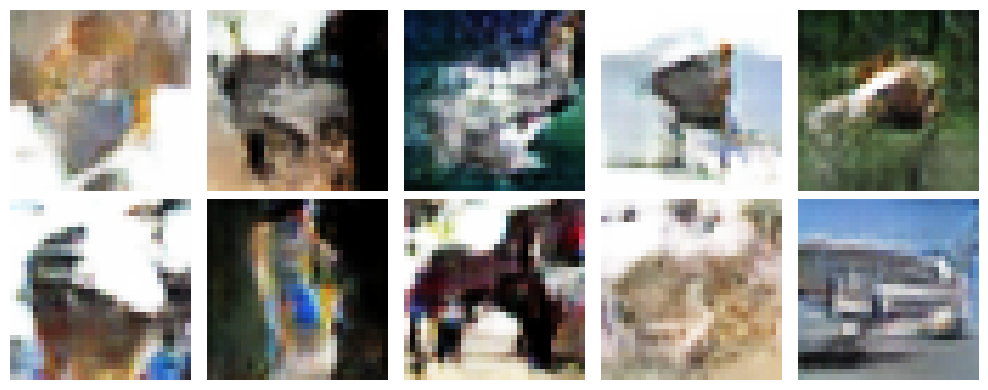

epoch: 20 loss generator: 3.3356 loss discriminator: 0.4466


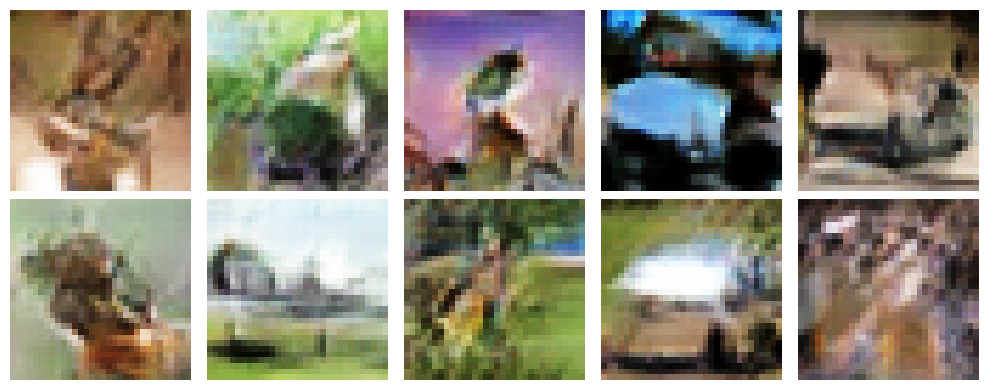

epoch: 21 loss generator: 3.4926 loss discriminator: 0.4017


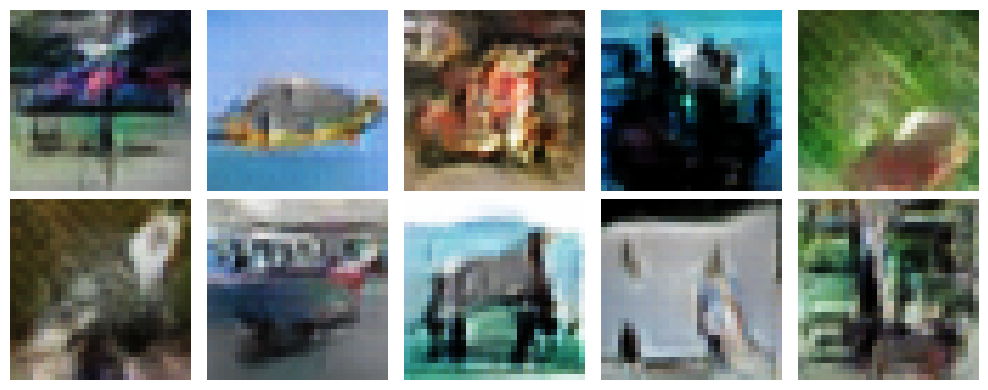

epoch: 22 loss generator: 3.5266 loss discriminator: 0.3856


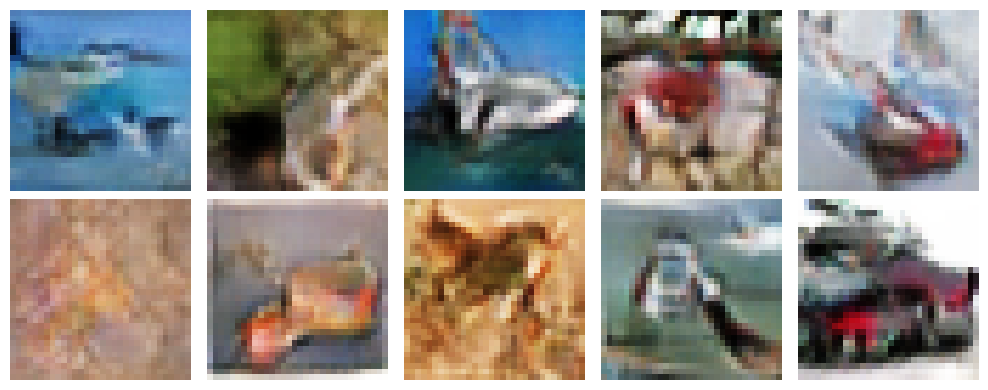

epoch: 23 loss generator: 3.5893 loss discriminator: 0.3880


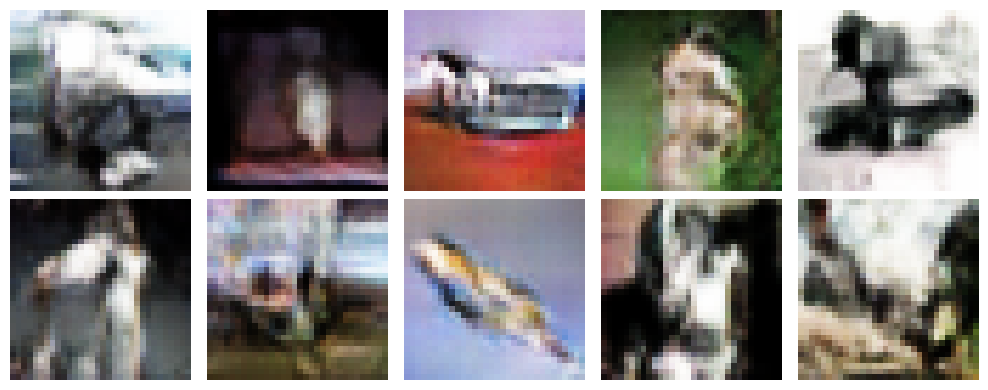

epoch: 24 loss generator: 3.6625 loss discriminator: 0.3516


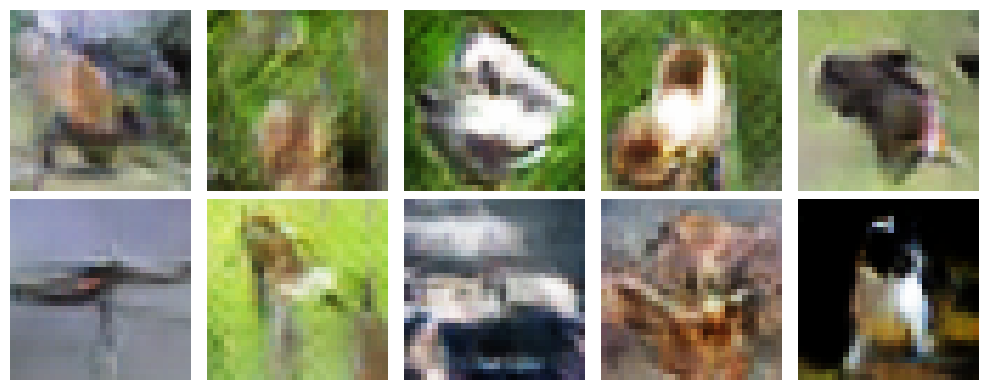

epoch: 25 loss generator: 3.7438 loss discriminator: 0.3429


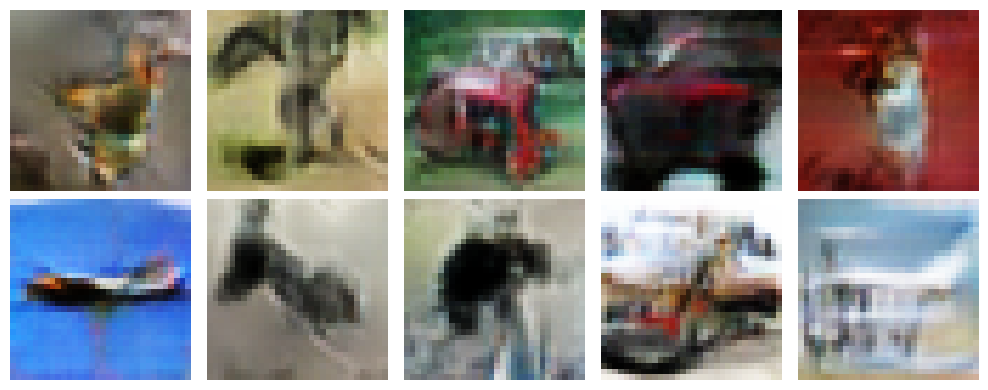

epoch: 26 loss generator: 3.6950 loss discriminator: 0.3311


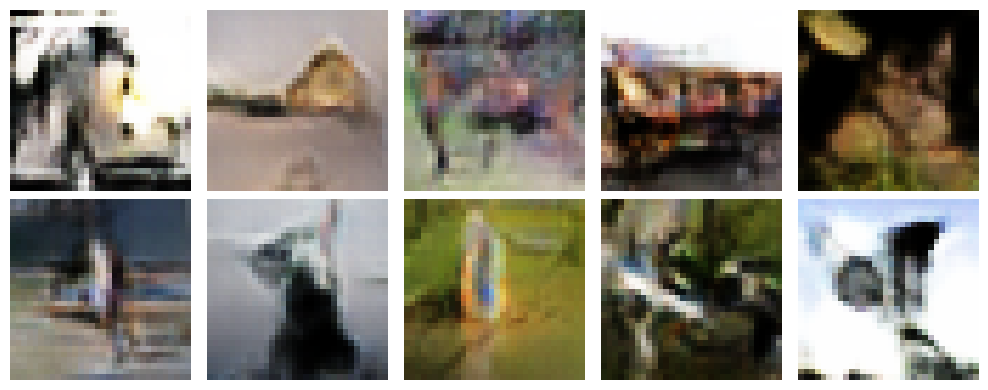

epoch: 27 loss generator: 3.7564 loss discriminator: 0.3681


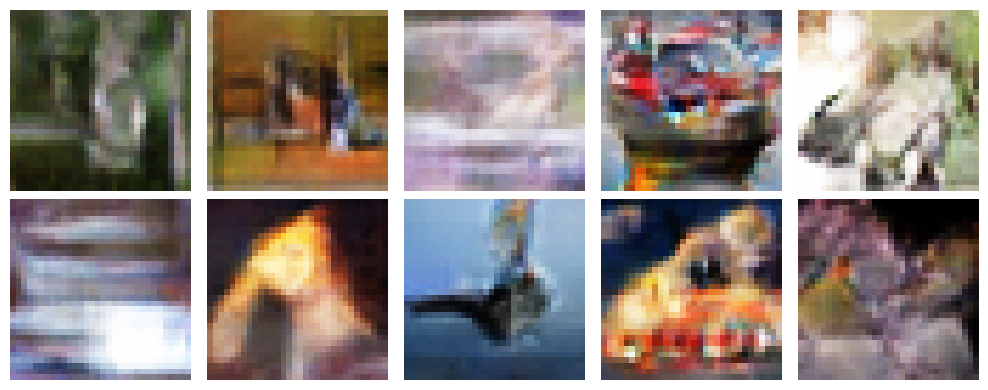

epoch: 28 loss generator: 3.9000 loss discriminator: 0.3011


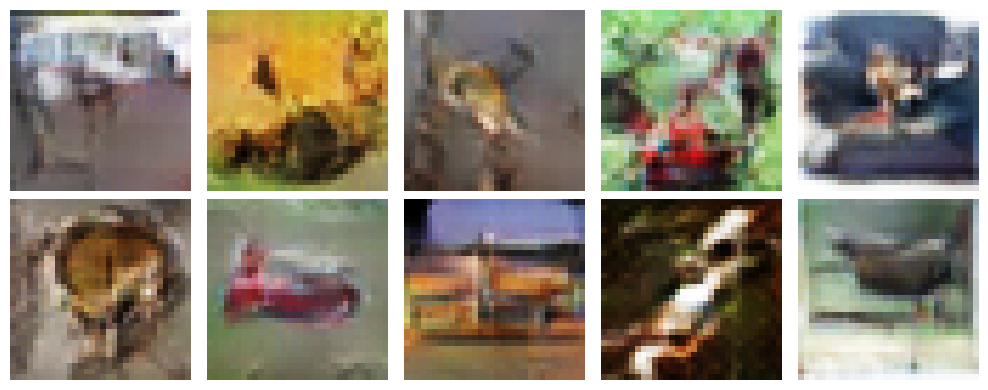

epoch: 29 loss generator: 3.8247 loss discriminator: 0.3134


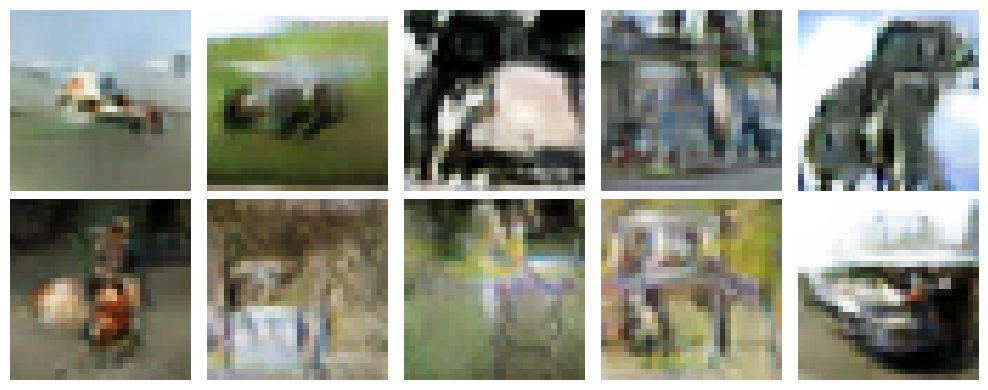

epoch: 30 loss generator: 3.8266 loss discriminator: 0.3013


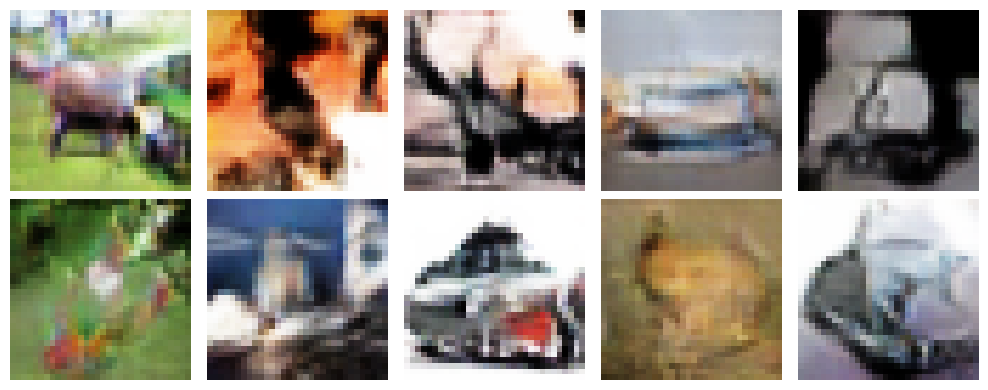

epoch: 31 loss generator: 3.9602 loss discriminator: 0.3230


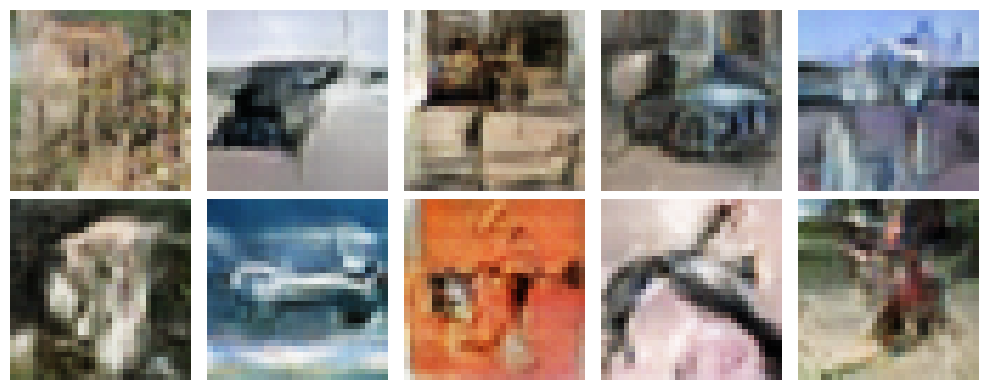

epoch: 32 loss generator: 4.0230 loss discriminator: 0.2432


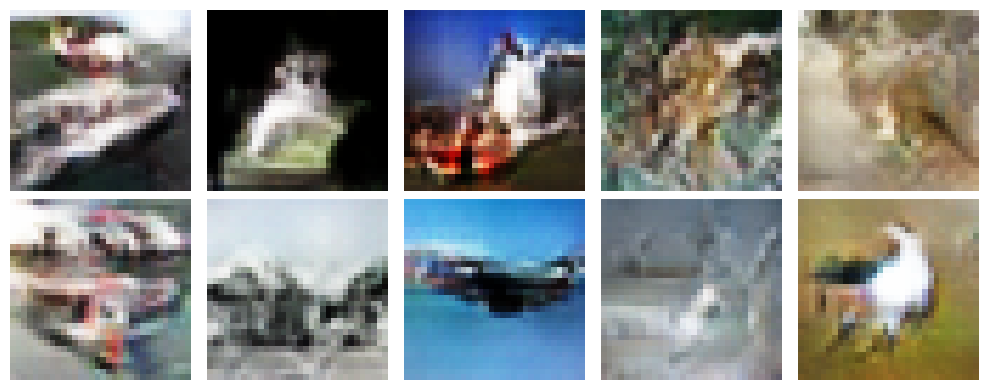

epoch: 33 loss generator: 4.1399 loss discriminator: 0.2917


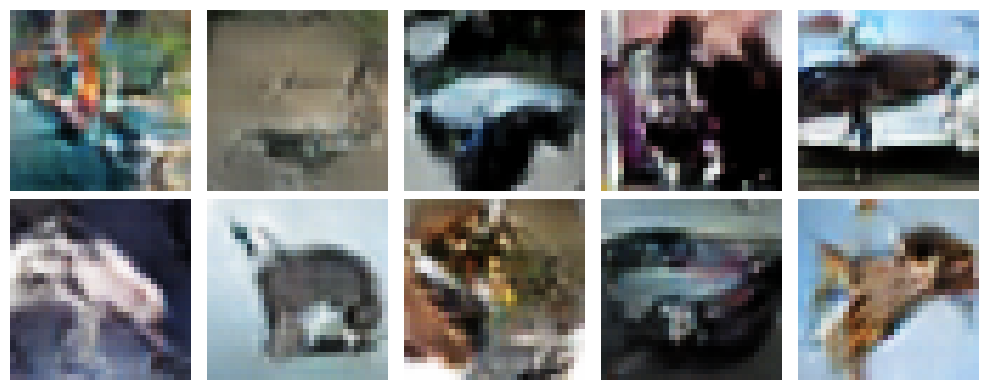

epoch: 34 loss generator: 4.0682 loss discriminator: 0.2450


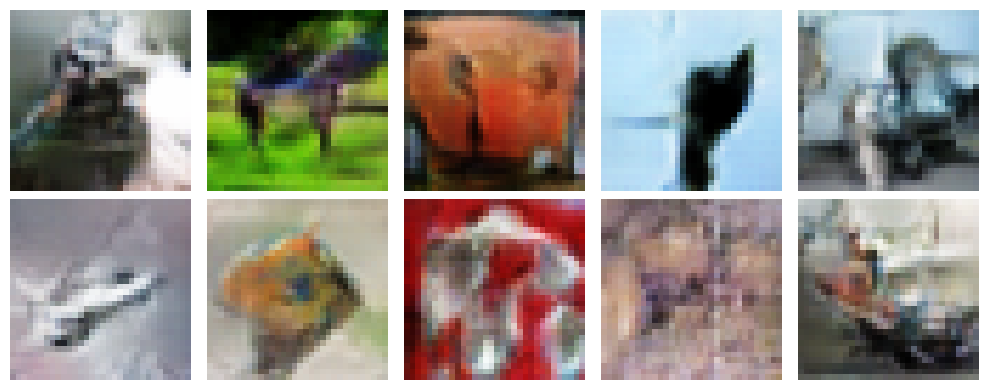

epoch: 35 loss generator: 4.0553 loss discriminator: 0.2643


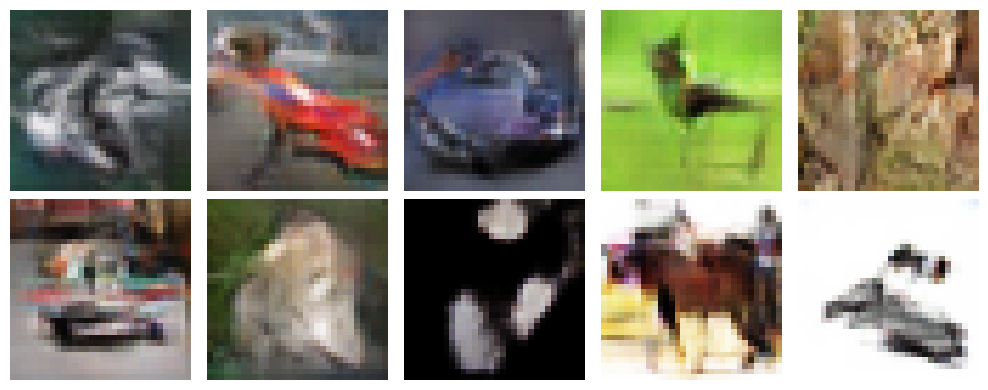

epoch: 36 loss generator: 4.1814 loss discriminator: 0.2877


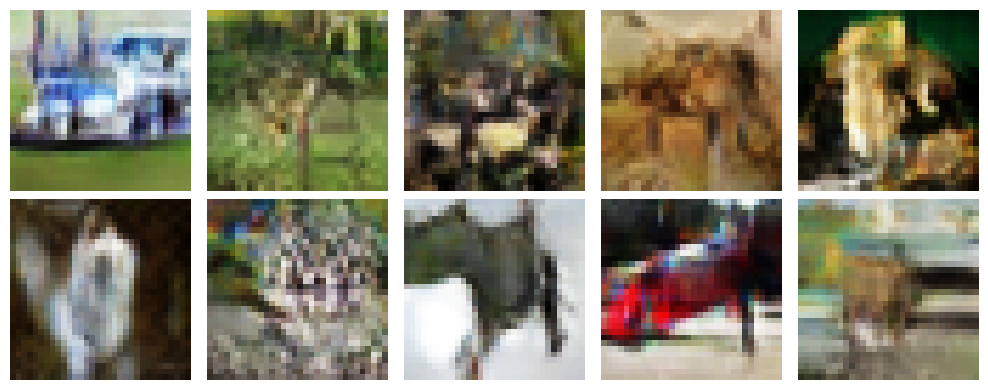

epoch: 37 loss generator: 4.2221 loss discriminator: 0.2767


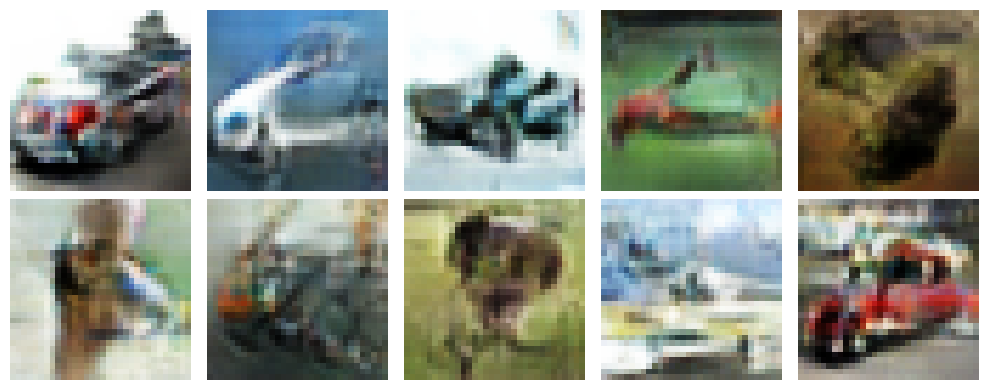

epoch: 38 loss generator: 4.2603 loss discriminator: 0.2572


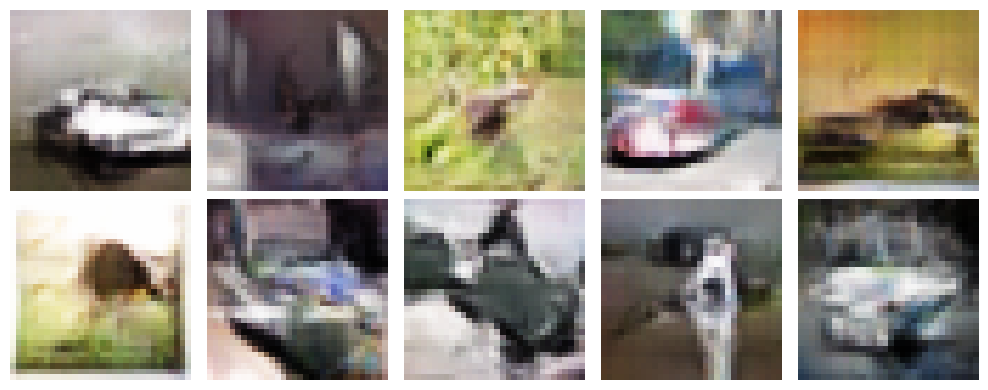

epoch: 39 loss generator: 4.4963 loss discriminator: 0.1396


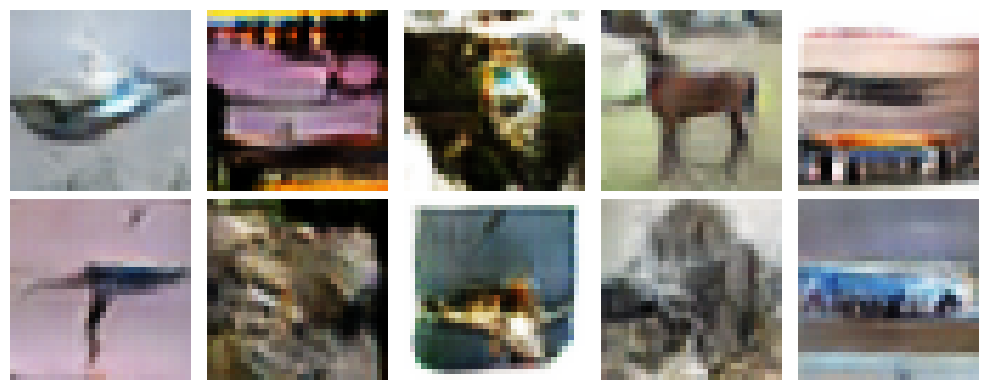

epoch: 40 loss generator: 4.2656 loss discriminator: 0.3023


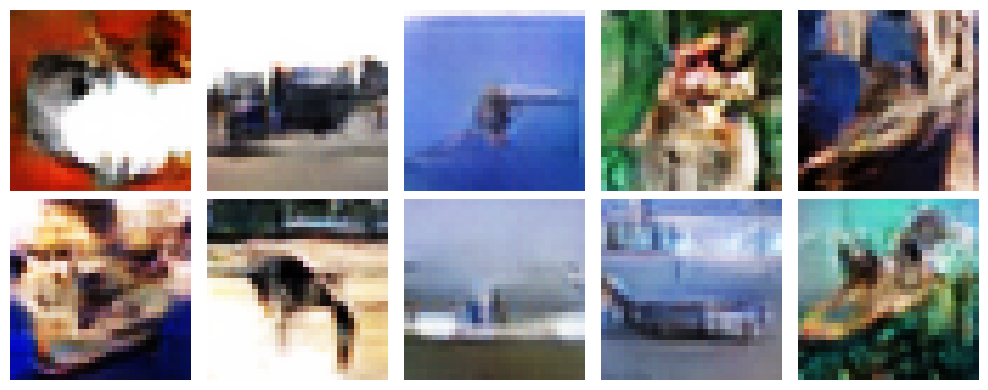

epoch: 41 loss generator: 4.4343 loss discriminator: 0.2170


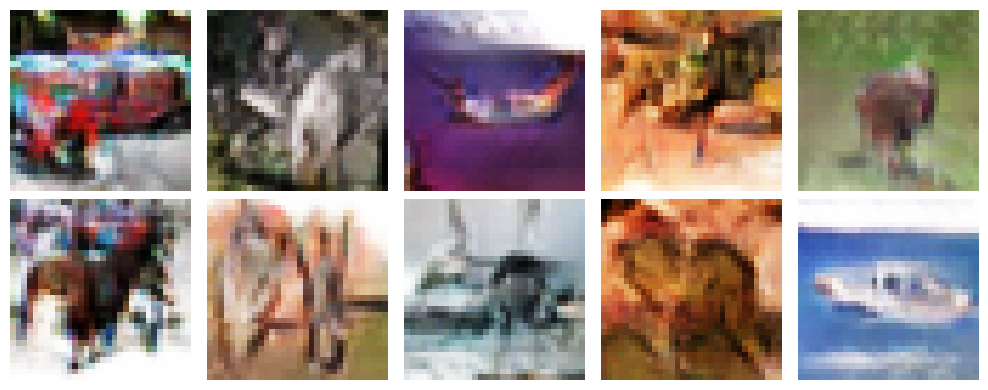

epoch: 42 loss generator: 4.3612 loss discriminator: 0.2996


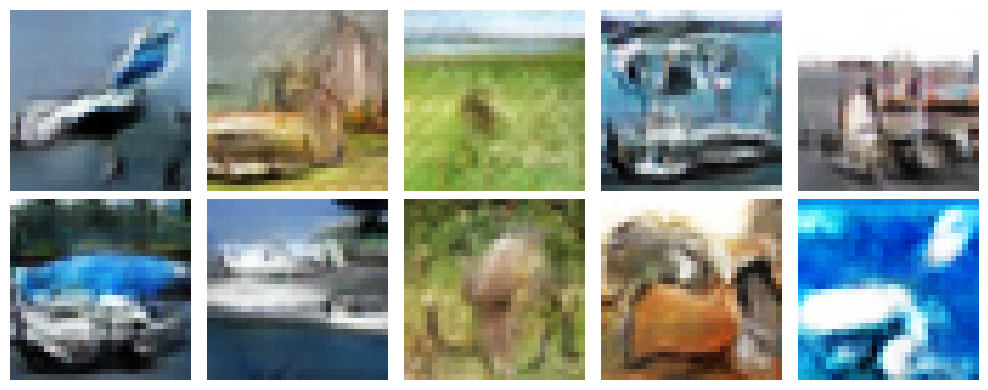

epoch: 43 loss generator: 4.5494 loss discriminator: 0.1601


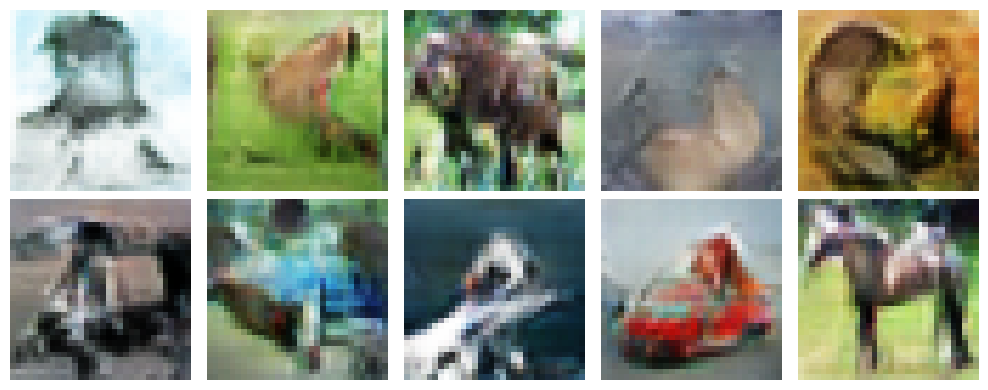

epoch: 44 loss generator: 4.6143 loss discriminator: 0.2161


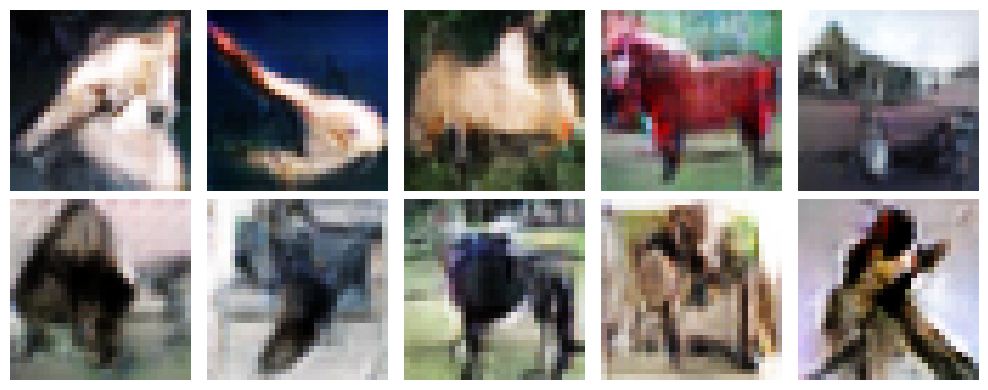

epoch: 45 loss generator: 4.6245 loss discriminator: 0.2026


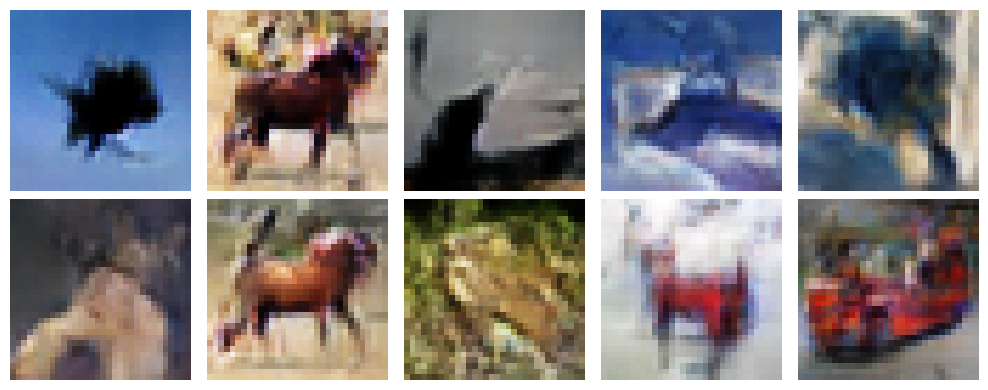

epoch: 46 loss generator: 4.6219 loss discriminator: 0.1988


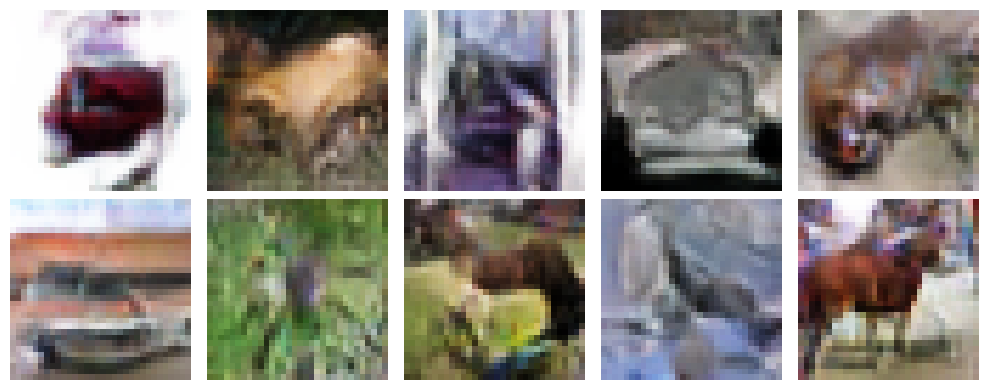

epoch: 47 loss generator: 4.9056 loss discriminator: 0.2181


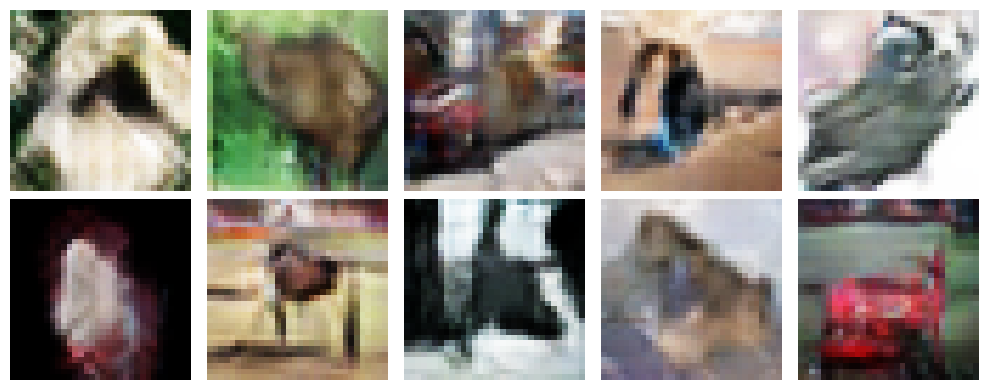

epoch: 48 loss generator: 4.6663 loss discriminator: 0.2123


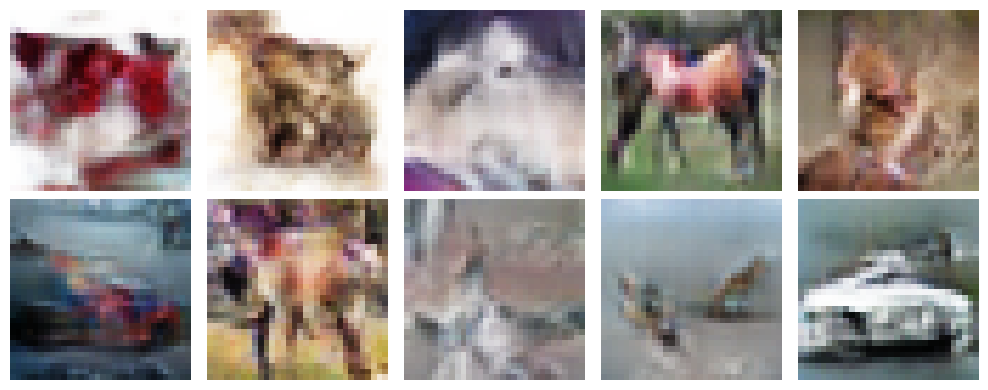

epoch: 49 loss generator: 4.8512 loss discriminator: 0.1603


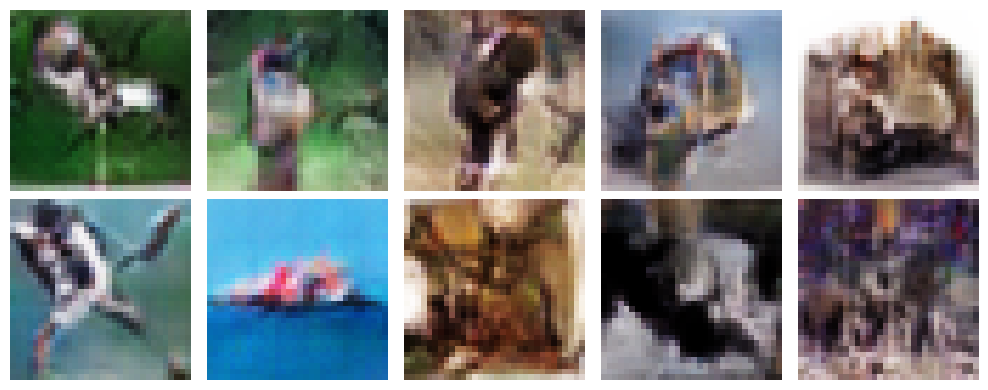

epoch: 50 loss generator: 4.6983 loss discriminator: 0.2562


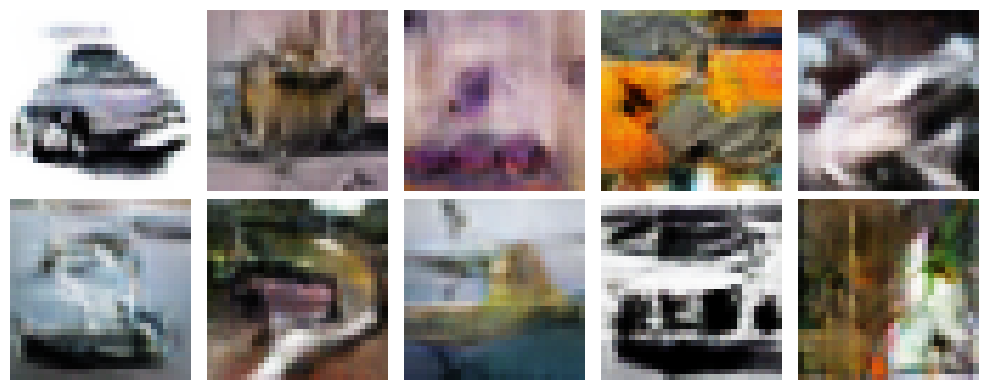

epoch: 51 loss generator: 4.8853 loss discriminator: 0.1405


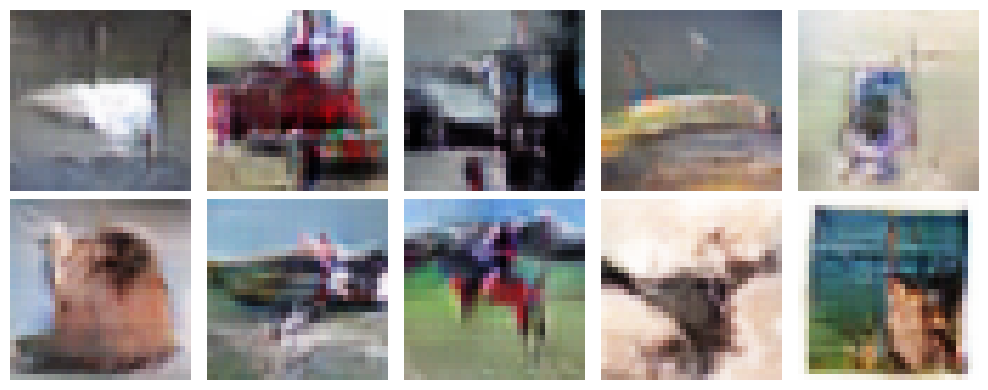

KeyboardInterrupt: 

In [8]:
losses_D, losses_G = [], []
N = len(dataloader.dataset)
for epoch in range(epochs):
    G.train(); D.train()
    total_loss_G, total_loss_D = 0.0, 0.0
    for x, _  in dataloader:
        # x is sampled from data generating distribution x ~ p_data
        x = x.to(device)

        # z is sampled from noise prior z ~ p_noise
        z = torch.distributions.uniform.Uniform(low=-1, high=1).sample([x.shape[0], 100]).to(device)
        D_x = D(x)
        D_G_z = D(G(z))

        # update descriminator by ascending its stochastic gradient
        optimizer_D.zero_grad()
        loss_d = criterion_D(D_x, D_G_z)
        loss_d.backward()
        optimizer_D.step()
        
        # z is sampled from noise prior
        # z ~ p_noise
        z = torch.distributions.uniform.Uniform(low=-1, high=1).sample([x.shape[0], 100]).to(device)
        D_G_z = D(G(z))

        # update generator by descending its stochastic gradient
        optimizer_G.zero_grad()
        loss_g = criterion_G(D_G_z)
        loss_g.backward()
        optimizer_G.step()

        total_loss_D += loss_d.item() * x.shape[0]
        total_loss_G += loss_g.item() * z.shape[0]
    losses_D.append(total_loss_D / N)
    losses_G.append(total_loss_G / N)

    if verbose: 
        print(f'epoch: {epoch} loss generator: {(total_loss_G/N):.4f} loss discriminator: {(total_loss_D/N):.4f}')
    
    # short visualization, to see, if it works :D
    save_plot(generator=G, Z_noise=Z_noise, epoch=epoch) 
    G.eval() 
    fig, ax = plt.subplots(nrows, ncols, figsize=figsize)  
    ax = ax.flatten() 
    for i in range(nrows * ncols):
        z = torch.distributions.uniform.Uniform(low=-1, high=1).sample([1, 100]).to(device)
        G_z = G(z)
        img = G_z.view(IMAGE_SHAPE).permute(1, 2, 0).detach().cpu().numpy()
        ax[i].imshow(((img + 1)/2).clip(0, 1))
        ax[i].axis('off')
    plt.tight_layout() 
    plt.show(fig) 

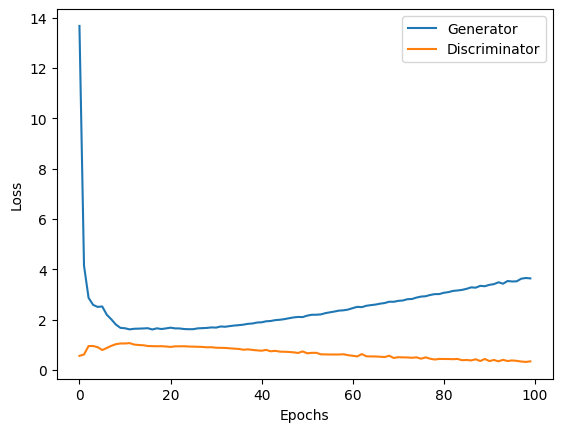

In [ ]:
x = np.arange(len(losses_G))
_, ax = plt.subplots()
ax.plot(x, losses_G, label='Generator')
ax.plot(x, losses_D, label='Discriminator')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()